In [2]:
import uproot
import awkward as ak


In [69]:
vec = {
    'clock_x':[[1,2,3],[4,5,6],[7,8,9]], 
    'clock_y':[[2,3,4],[6,5,4],[9,8,7]],
}


evec = {
    'i_evt': [1,2,3,4,5,6,7],
    'toa': [[1],[2,3,4],[5,6],[7],[8],[9,10],[]],
    'tot': [[1],[2,3,4],[5,6],[7],[8],[9,10],[]],
    'cal': [[1],[2,3,4],[5,6],[7],[8],[9,10],[]],
    'clock_x':[[1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10]], 
    'clock_y':[[1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10]], 
}

with uproot.recreate('test.root') as output:
    output['raw_clock_waveforms'] = vec
    output['raw_mcp_waveforms'] = vec
    output['etroc'] = evec



In [72]:
data = uproot.open('test.root')

f = data['etroc'].arrays()
# f['tstamp'] = [11,22,33,44,55,66,77,88,99,1010]

f[1]

<Record {i_evt: 2, ntoa: 3, toa: [...], ...} type='{i_evt: int64, ntoa: int...'>

In [ ]:
"""
CLOCK CONFIGURABLES
CLOCK_THRESH_LOW, CLOCK_THRESH_HIGH = 0.25, 0.8 #used to pick out the edges (between 0 and 1, percentage of the absolute amplitude)
CLOCK_MEAUREMENT_POINT = 0.5 #between 0 and 1, after the fit, where along the fitted y axis do we take the clock value
MCP_MAX_AMP = -1.35, make this auto with data in scope!


nanoseconds, scaled_volts = mcp.MCPSignalScaler.normalize(mcp_waveform.x * 1e9, mcp_waveform.y, signal_saturation_level=MCP_MAX_AMP)
peak_times, peak_volts = mcp.MCPSignalScaler._calc_mcp_peaks(nanoseconds, mcp_waveform.y)
mcp_timestamps = mcp.linear_interpolation(nanoseconds, scaled_volts, peak_times, threshold=0.4)
clock_timestamps = clock.calc_clock(
    ak.from_numpy(clock_waveform.x*1e9), ak.from_numpy(clock_waveform.y),
    CLOCK_THRESH_LOW, CLOCK_THRESH_HIGH, CLOCK_MEAUREMENT_POINT
)

"""

In [73]:
data_paths = [
    '/home/etl/Test_Stand/ETL_TestingDAQ/rereco_data/run_12092.root',
    '/home/etl/Test_Stand/ETL_TestingDAQ/rereco_data/run_12091.root',
    '/home/etl/Test_Stand/ETL_TestingDAQ/rereco_data/run_12094.root',
    '/home/etl/Test_Stand/ETL_TestingDAQ/rereco_data/run_12096.root'
]

data = uproot.concatenate([{d:'pulse'} for d in data_paths])

In [24]:
import numpy as np
import awkward as ak

cal_val1 = [[[1,2,3,4,5]]*16]*16

[[[1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1]], [[1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1]], [[1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 5, 1]], [[1, 2, 3, 4, 5, 1], [1, 2, 3, 4,

In [25]:
import uproot
import awkward as ak
import hist
from hist import Hist
import matplotlib.pyplot as plt
import mplhep as hep
import sys
sys.path.append('/home/etl/Test_Stand/tbanalysis/') #stupid python
from utils import plotting as pu
import numpy as np
from importlib import reload

import yaml

reload(pu)
def tb_plot_res_group(tb_plot: pu.TBplot, extra_label="", cmax_hits=None, cmax_res=None, pixel_excludes=None):
    tb_plot.hist_bins['res_shape_comp'] = (20,10,150)
    # tb_plot.resolution_corrected_shape(fill_between=False, extra_label=extra_label)
    
    beam_spot_20 = tb_plot.beam_spot(35, pixel_excludes=pixel_excludes)
    # tb_plot.hit_map(cmax=cmax_hits)
    # tb_plot.hit_map_data[~beam_spot_20] = 0
    # tb_plot.hit_map(cmax=cmax_hits)

    # tb_plot.res_corr_map(cmax=cmax_res)
    # tb_plot.res_corr_map_data[~beam_spot_20] = 0
    # tb_plot.res_corr_map(cmax=cmax_res)

    # for calculation
    return beam_spot_20, tb_plot.res_corr_map_data[beam_spot_20]

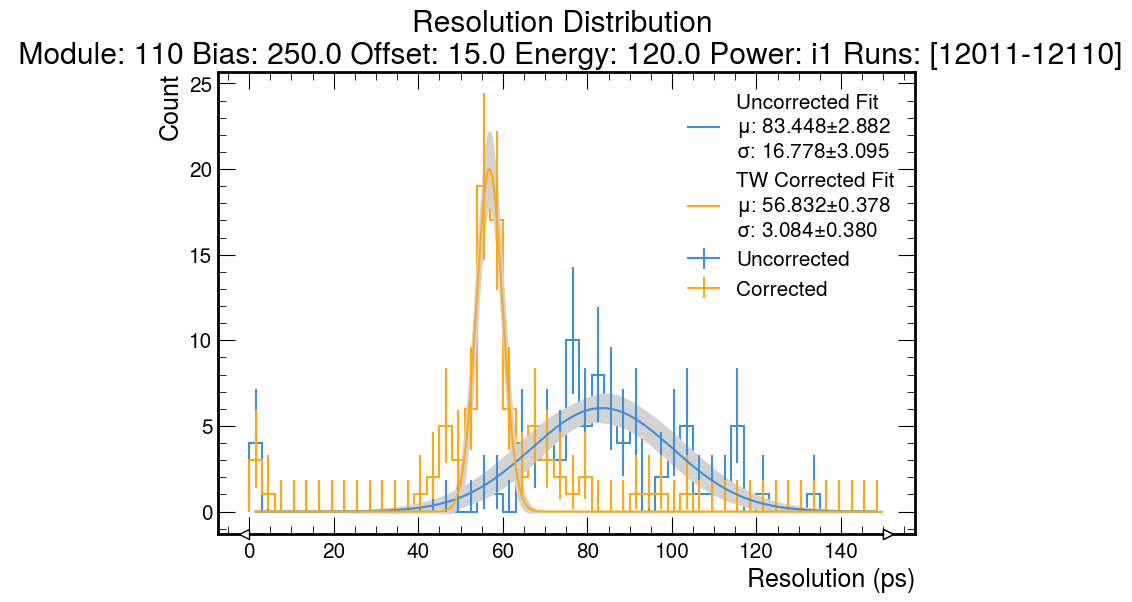

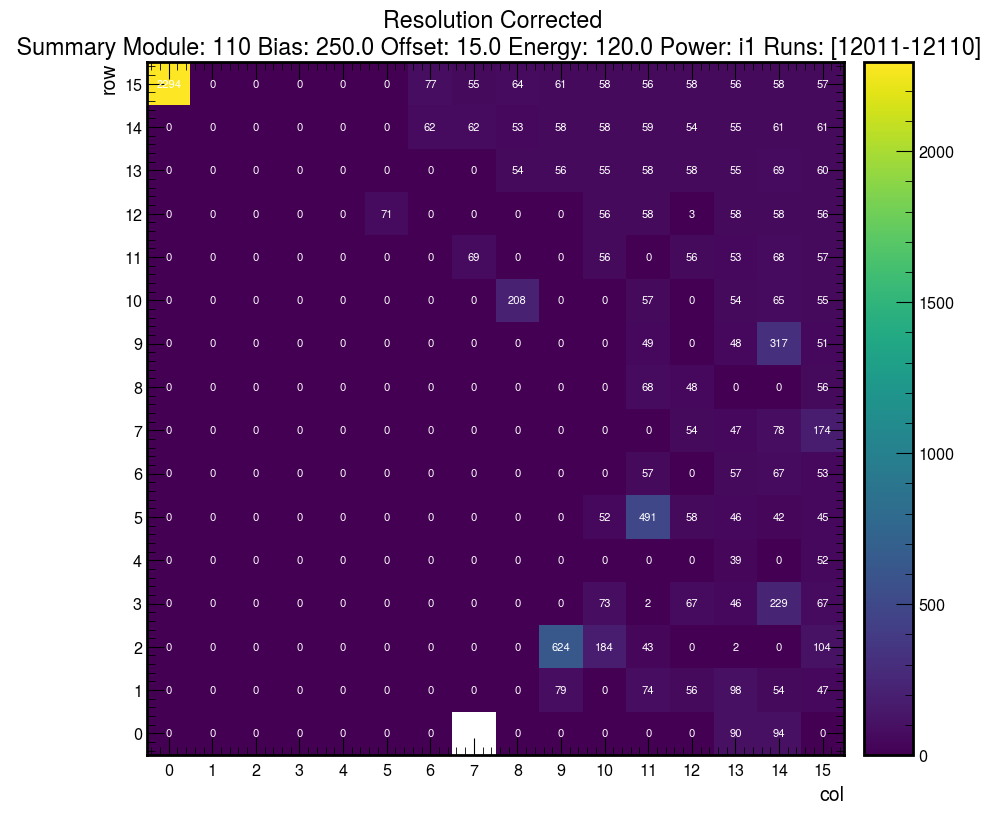

In [41]:
from utils import plotting as pu
import importlib
importlib.reload(pu)
correct = pu.TBplot(
    "/home/etl/Test_Stand/tbanalysis/output_analysis_data/refactor_clk_removed/start_12011_stop_12110_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_250_file_from_SPS_Oct_trigger_rate_5kHz_ambient_air_temp_C_-20.6_etroc_adc_temp_2374_cubicLM_unbinned"
)

correct.resolution_shape_comparison()
correct.res_corr_map()

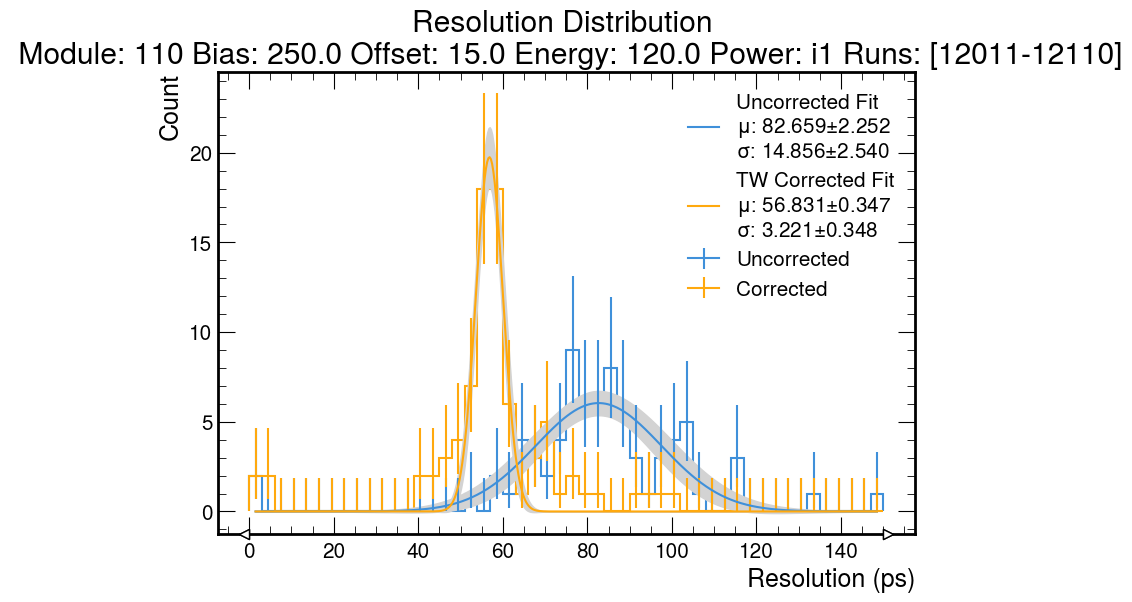

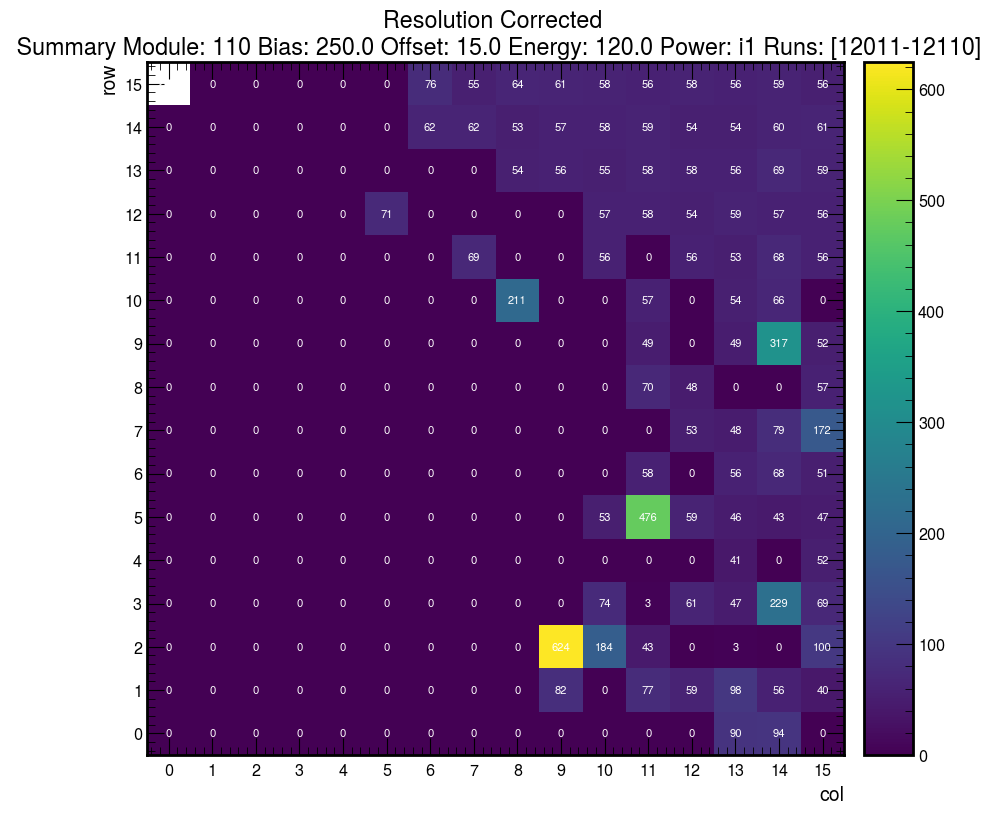

In [45]:

from utils_refactor import plotting as pu

import importlib
importlib.reload(pu)
speed = pu.TBplot(
"/home/etl/Test_Stand/tbanalysis/output_analysis_data/refactor_clk_removed_speed/start_12011_stop_12110_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_250_file_from_SPS_Oct_trigger_rate_5kHz_ambient_air_temp_C_-20.6_etroc_adc_temp_2374_cubicLM_unbinned"
)
speed.resolution_shape_comparison()
speed.res_corr_map()
